In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 27.8MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


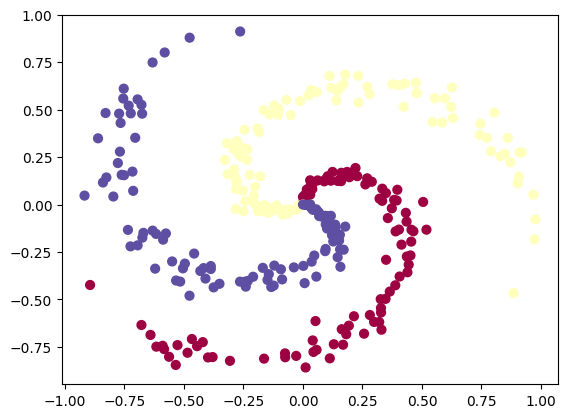

In [ ]:
plt.scatter(df["x1"], df["x2"], c=df["y"], s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
df['y'].value_counts()

0    100
1    100
2    100
Name: y, dtype: int64

In [ ]:
#how we can manually calculate loss using this format only

In [ ]:
# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [ ]:
d = X.shape[1] # 2 - dimensionality, number of features
n = len(np.unique(y)) #3 - number of classes
m = X.shape[0] # number of examples
print(d, n, m)

2 3 300


In [ ]:
W = 0.01* np.random.rand(d,n)
b = np.zeros((1,n))

In [ ]:
z=np.dot(X,W) + b

In [ ]:
#softmax

exp_z=np.exp(z)

a = exp_z/np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
a

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33334413, 0.3333428 , 0.33331307],
       [0.33335812, 0.33334369, 0.3332982 ],
       [0.33336981, 0.33335557, 0.33327462],
       [0.333378  , 0.33336981, 0.33325219],
       [0.33339255, 0.3333742 , 0.33323326],
       [0.33340759, 0.33336331, 0.3332291 ],
       [0.33341983, 0.33337901, 0.33320115],
       [0.33342949, 0.3333957 , 0.33317481],
       [0.33344503, 0.33338517, 0.3331698 ],
       [0.33345619, 0.33340269, 0.33314113],
       [0.33346869, 0.33340855, 0.33312276],
       [0.33348159, 0.3334118 , 0.33310662],
       [0.33349078, 0.33343154, 0.33307768],
       [0.33350709, 0.33341303, 0.33307989],
       [0.33351651, 0.33339282, 0.33309067],
       [0.33352908, 0.33339845, 0.33307248],
       [0.33353501, 0.3333801 , 0.33308489],
       [0.33355397, 0.33340865, 0.33303739],
       [0.33354927, 0.33336247, 0.33308826],
       [0.33355545, 0.33335347, 0.33309108],
       [0.33359004, 0.3334178 , 0.33299216],
       [0.

In [ ]:
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [ ]:
dz=a

dz[range(m),y]-=1

In [ ]:
X.shape

(300, 2)

In [ ]:
dz.shape

(300, 3)

In [ ]:
W.shape

(2, 3)

In [ ]:
dw = np.dot(X.T, dz)

In [ ]:
dw.shape

(2, 3)

In [ ]:
b.shape

(1, 3)

In [ ]:
db=np.sum(dz, axis=0, keepdims=True)

In [ ]:
lr = 0.1
W += -lr * dW
b += -lr * db

NameError: ignored

In [ ]:
max_iters = 500
lr = 1

d = X.shape[1]
n = len(np.unique(y))
m = X.shape[0]
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))
loss_history = []

for i in range(max_iters):
    # evaluate the class probs
    z = np.dot(X, W) + b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/m
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"iteration: {i}, loss: {loss}")


    # compute the gradient on score
    dZ = probs
    dZ[range(m),y] -= 1
    dZ = dZ/m
    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)

    # perform a parameter update using gradient descent
    W += -lr * dW
    b += -lr * db
# history = pd.DataFrame({'step': list(range(max_iters)), 'loss': loss_history})
# history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

In [ ]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

NameError: ignored

In [ ]:
import numpy as np
# initialize parameters randomly
d = 2 # diensionality / number of inputs
n = 3 # Number of classes (A/B/C) / Number of neurons in output layer
h = 4 # neurons in hidden layer

In [ ]:
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

In [ ]:
Z1 = np.dot(X, W1) + b1 # (300,2) x (2,4) + (1,4) => (300,4)
A1 = np.maximum(0, Z1) # ReLU if Z1 < 0 A1 =0 else A1 = Z1

In [ ]:
Z2 = np.dot(A1, W2) + b2  # (300, 4) x (4, 3) + (1, 3) => (300, 3)
# Applying softmax function to get A2
Z2_exp = np.exp(Z2)
A2 = Z2_exp/np.sum(Z2_exp, axis=1, keepdims=True)
probs = A2

In [ ]:
m = X.shape[0] # number of examples

dZ2 = probs
dZ2[range(m),y] -= 1

In [ ]:
# shape A1 => (300,4)  shape dZ2 (equal to probability)=> (300,3)
dW2 = np.dot(A1.T, dZ2)/m # shape => (4, 300) x (300, 3) => (4,3)

In [ ]:
db2 = np.sum(dZ2, axis=0, keepdims=True)/m # shape (1 ,3)

In [ ]:
dA1 = np.dot(dZ2, W2.T) # (300,3) x (3 , 4) => (300, 4)

In [ ]:
dA1[Z1 <= 0] = 0 # was dA1[A1 <= 0] = 0. changed it to dA1[Z1 <= 0] = 0
dZ1 = dA1 # same shape as dA1 (300, 4)

In [ ]:
dW1 = np.dot(X.T, dZ1)/m # (2, 300) x (300 ,4) => (2, 4)
db1 = np.sum(dZ1, axis=0, keepdims=True)/m

In [ ]:
lr = 1e-0

# perform a parameter update
W1 += -lr * dW1
b1 += -lr * db1
W2 += -lr * dW2
b2 += -lr * db2

In [ ]:
# initialize parameters randomly
d = 2
h = 100 # size of hidden layer
n = 3
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

# some hyperparameters
lr = 1e-0
reg = 1e-3 # regularization strength
num_examples = X.shape[0]

for i in range(10000):

    # forward prop
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, W2) + b2
    Z2 = np.exp(Z2)
    A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
    probs = A2

    # calc. loss
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2) # regularization
    loss = data_loss + reg_loss # adding reg. to loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # backprop
    # compute the gradient on scores
    dZ2 = probs
    dZ2[range(num_examples),y] -= 1
    dZ2 /= num_examples

    # first backprop into parameters W2 and b2
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    # next backprop into hidden layer, A1
    dA1 = np.dot(dZ2, W2.T)
    # backprop the ReLU non-linearity
    dA1[Z1 <= 0] = 0
    # finally into W,b
    dZ1 = dA1
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW1 += reg * W1

    # perform a parameter update
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2

In [ ]:
class NN:

    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))

    def fwd_prop(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1
        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))

            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)

            # add regularization gradient contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1) # ReLU(Z1) = ReLU(W1T. X + b1)
        Z2 = np.dot(A1, self.W2) + self.b2 # Z2 = W2T.A1 + b2 => 3 probab
        y_hat = np.argmax(Z2, axis=1) # taking index of max probab
        return y_hat

nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(X) == y)))

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid

y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
mlp=MLPClassifier(solver='adam',alpha=1e-5, hidden_layer_sizes=(100), random_state=42,
                  activation='relu', max_iter=10000 )

mlp.fit(X,y)

print(mlp.score(X,y))

In [ ]:
mlp.loss_

In [ ]:
import numpy as np
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [ ]:
from tensorflow import keras
import pandas as pd

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU" -O healthyfime.csv

--2023-09-18 17:24:41--  https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
Resolving drive.google.com (drive.google.com)... 74.125.203.101, 74.125.203.100, 74.125.203.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0figfu3nsjnln90lvqe17vu6rlprvgq1/1695057825000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=430f0283-06fa-47ff-9a4d-835923cb8abd [following]
--2023-09-18 17:24:42--  https://doc-0s-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0figfu3nsjnln90lvqe17vu6rlprvgq1/1695057825000/01388099838663554274/*/1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU?e=download&uuid=430f0283-06fa-47ff-9a4d-835923cb8abd
Resolving doc-0s-50-docs.googleusercontent.com (doc-0s-50-docs.googleusercontent.com)... 74.125.23.132, 2404:6

In [ ]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df.replace({"M":0, "F":1} , inplace = True)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
classes = list(df['class'].unique())
mapping_dict = { ch : i for i, ch in enumerate(sorted(classes, reverse=True)) }
print (mapping_dict)
df['class'].replace(mapping_dict , inplace = True)
df.head()

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


<Axes: >

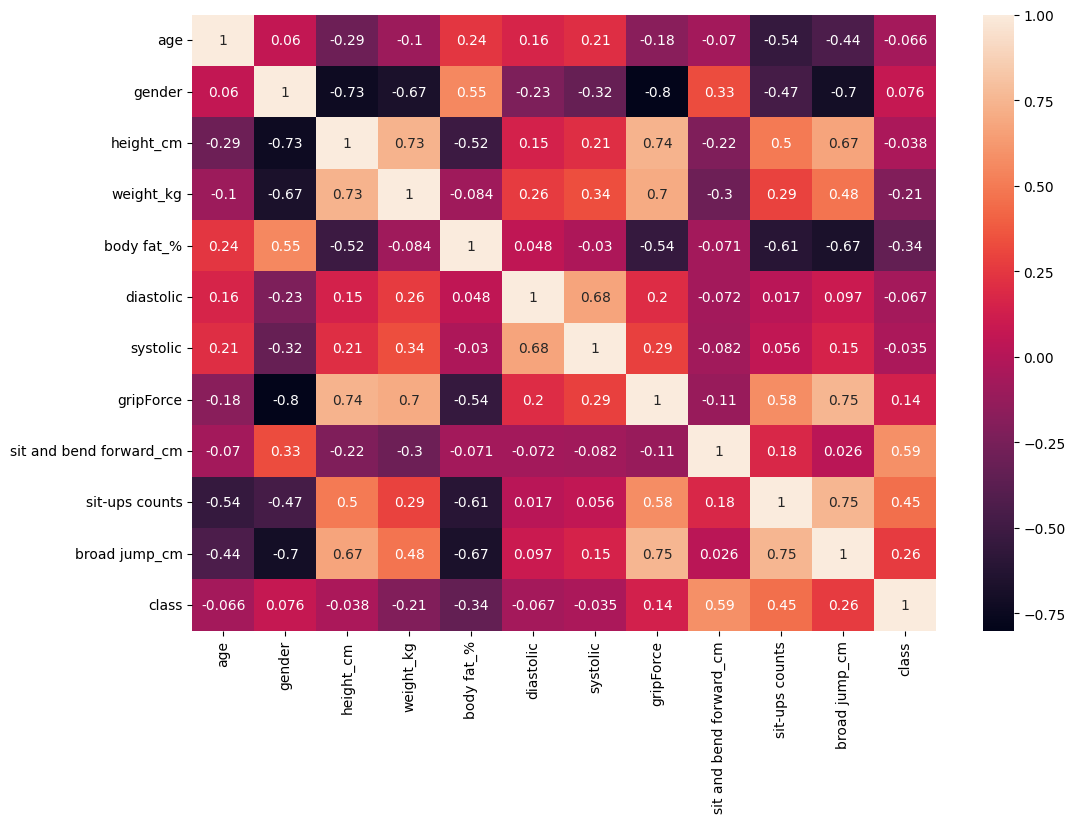

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

<Axes: >

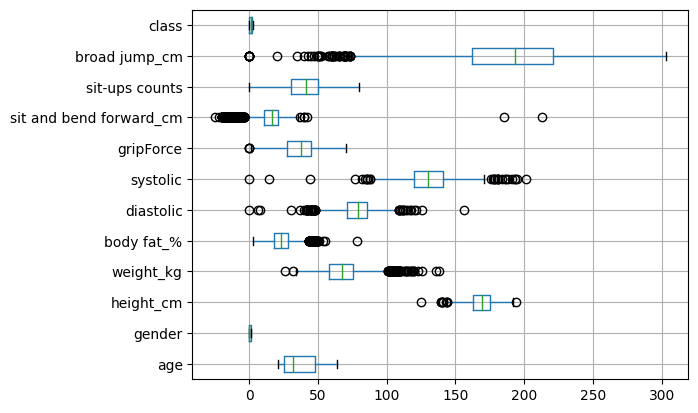

In [ ]:
df.boxplot(rot = 0, vert=False)


In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(13393, 11) (13393,)


In [ ]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Valid : ', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (10847, 11) (10847,)
Valid :  (1206, 11) (1206,)
Test  :  (1340, 11) (1340,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train,y_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

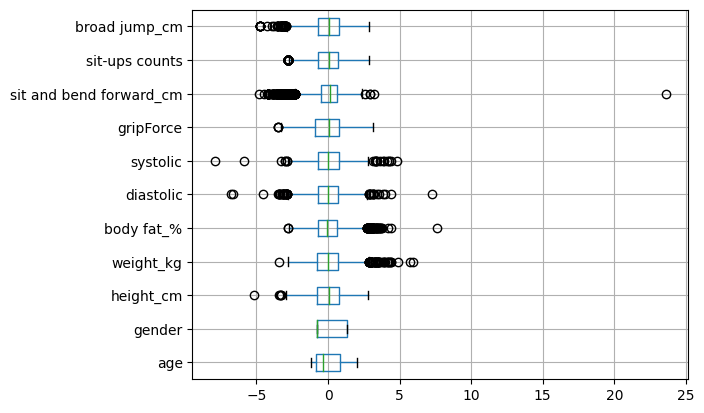

In [ ]:
pd.DataFrame(X_train,columns=df.columns[:-1]).boxplot(rot = 0, vert=False)

In [ ]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [ ]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__cxx_version__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__internal__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_estimator_module',
 '_fi',
 '_initializers',
 '_inspect',
 '_keras',
 '_keras_module',
 '_keras_package',
 '_kerne

In [ ]:
dir(tf.keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'dtensor',
 'estimator',
 'experimental',
 'export',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'saving',
 'utils']

In [ ]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [ ]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential(
    [Dense(64, input_shape=(11, ), activation='relu', name='hidden1' ),
                  Dense(4, activation='softmax',  name='op')


])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 64)                768       
                                                                 
 op (Dense)                  (None, 4)                 260       
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# 2 d image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_2D = Sequential([
                    Flatten(input_shape=(28, 28)), # flatten the data to make it (784,) to be based further
                    Dense(64, activation="relu"),
                    Dense(4, activation="softmax")
])

In [ ]:
model_2D.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 50500 (197.27 KB)
Trainable params: 50500 (197.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train,batch_size=150,  epochs=20, validation_split=0.1, verbose=1)

Epoch 1/20
66/66 [==============================] - 2s 9ms/step - loss: 1.2722 - accuracy: 0.4172 - val_loss: 1.1384 - val_accuracy: 0.4959
Epoch 2/20
66/66 [==============================] - 0s 5ms/step - loss: 1.0590 - accuracy: 0.5449 - val_loss: 1.0109 - val_accuracy: 0.5521
Epoch 3/20
66/66 [==============================] - 0s 4ms/step - loss: 0.9622 - accuracy: 0.5830 - val_loss: 0.9449 - val_accuracy: 0.5779
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.9124 - accuracy: 0.6032 - val_loss: 0.9068 - val_accuracy: 0.5954
Epoch 5/20
66/66 [==============================] - 1s 9ms/step - loss: 0.8834 - accuracy: 0.6181 - val_loss: 0.8863 - val_accuracy: 0.6028
Epoch 6/20
66/66 [==============================] - 0s 4ms/step - loss: 0.8665 - accuracy: 0.6235 - val_loss: 0.8717 - val_accuracy: 0.6194
Epoch 7/20
66/66 [==============================] - 0s 5ms/step - loss: 0.8519 - accuracy: 0.6306 - val_loss: 0.8592 - val_accuracy: 0.6203
Epoch 8/20
66/66 [==

In [ ]:
from tensorflow.keras.layers import Input

inp= Input(11,1)

In [ ]:
h1= Dense (16, activation ='relu', kernel_initializer='he_uniform', name='hidden1')(inp)

h2= Dense (4, activation ='relu', kernel_initializer='he_uniform', name='hidden2')(h1)

out= Dense (4, activation ='softmax', name='output')(h2)



In [ ]:
from tensorflow.keras.models import Model

model_functional=Model(inputs= inp, outputs= out, name='Simle NN using Functional API')

In [ ]:
def create_functional_model ():
  inp= Input(11,1)
  h1= Dense (16, activation ='relu', kernel_initializer='he_uniform', name='hidden1')(inp)

  h2= Dense (4, activation ='relu', kernel_initializer='he_uniform', name='hidden2')(h1)

  out= Dense (4, activation ='softmax', name='output')(h2)

  model_functional=Model(inputs= inp, outputs= out)

  return model_functional



In [ ]:
model_functional_1 = create_functional_model()

In [ ]:
model_functional_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(1, 11)]                 0         
                                                                 
 hidden1 (Dense)             (1, 16)                   192       
                                                                 
 hidden2 (Dense)             (1, 4)                    68        
                                                                 
 output (Dense)              (1, 4)                    20        
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def create_functional_model_2 ():
  inp= Input(11,1)
  h1= Dense (16, activation ='relu', kernel_initializer='he_uniform', name='hidden1')(inp)

  h2= Dense (4, activation ='relu', kernel_initializer='he_uniform', name='hidden2')(h1)

  out1= Dense (4, activation ='softmax', name='output1')(h2)
  out2= Dense (4, activation ='relu', name='output2')(h2)

  model_functional=Model(inputs= inp, outputs= [out1, out2], name='2 outputs NN using Functional API')

  return model_functional



In [ ]:
model_functional = create_functional_model_2()

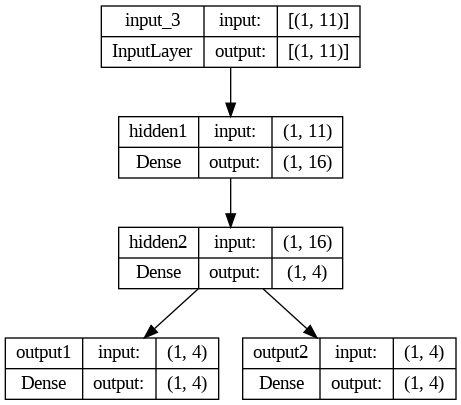

In [ ]:
tf.keras.utils.plot_model(model_functional,show_shapes=True)

In [ ]:
model_functional_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
history=model_functional_1.fit(X_train, y_train, epochs =500, validation_data=(X_val,y_val), verbose=0)

In [ ]:
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

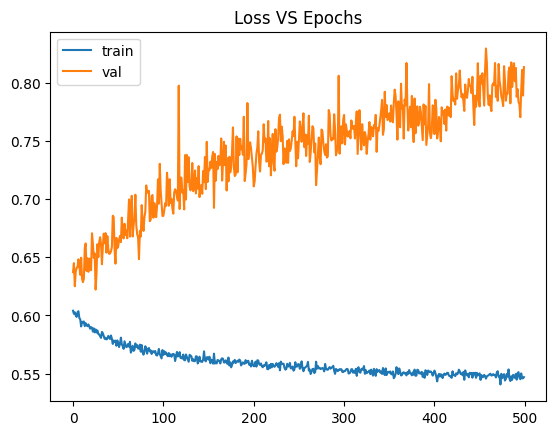

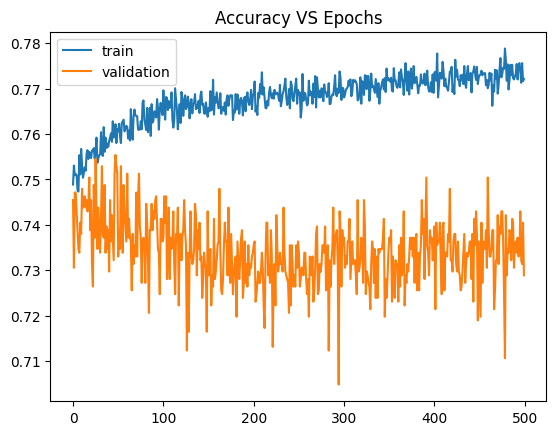

In [ ]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

In [ ]:
#example of custom callbacks
class TrainingCallback(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs=None):
        print("Starting training...")

    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")

    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")

    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}, loss is {logs['loss']}")

    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}, loss is {logs['loss']}, accuracy is {logs['accuracy']}")

    def on_train_end(self, logs=None):
        print("Finished training")

In [ ]:
class VerboseCallback(tf.keras.callbacks.Callback):
  # runs only before the training starts
  def on_train_begin(self, logs=None):
        print("Starting training...")

  # runs after every epoch
  def on_epoch_end(self, epoch, logs = None):
    if epoch % 50 == 0:
       print(f'Epoch {str(epoch).zfill(3)}', '- loss : ', logs['loss'], '- Acc : ', logs['accuracy'])

  # runs once training is finished
  def on_train_end(self, logs=None):
        print("...Finished training")

In [ ]:
history = model_functional.fit(X_train, y_train, epochs=500, batch_size=512, validation_split=0.1, verbose=0, callbacks=[VerboseCallback()])

Starting training...
Epoch 000 - loss :  0.5362381339073181 - Acc :  0.7804753184318542
Epoch 050 - loss :  0.4996257722377777 - Acc :  0.7966605424880981
Epoch 100 - loss :  0.5013688206672668 - Acc :  0.7951239347457886
Epoch 150 - loss :  0.5019747614860535 - Acc :  0.7933825254440308
Epoch 200 - loss :  0.5021669268608093 - Acc :  0.7915385961532593
Epoch 250 - loss :  0.5006754398345947 - Acc :  0.7937922477722168
Epoch 300 - loss :  0.5007997751235962 - Acc :  0.7944068908691406
Epoch 350 - loss :  0.4977780282497406 - Acc :  0.7962507605552673
Epoch 400 - loss :  0.5019716620445251 - Acc :  0.7936898469924927
Epoch 450 - loss :  0.5044264793395996 - Acc :  0.792460560798645
...Finished training


In [ ]:
%load_ext tensorboard

In [ ]:
log_folder = 'logs'

In [ ]:
%reload_ext tensorboard

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
tb_callback = TensorBoard(log_dir=log_folder)

In [ ]:

history = model_functional_1.fit(X_train, y_train, epochs=500, batch_size=512, validation_data = (X_val, y_val), verbose=0, callbacks=[VerboseCallback(), tb_callback])

Starting training...
Epoch 000 - loss :  1.4199570417404175 - Acc :  0.2668018937110901
Epoch 050 - loss :  0.6296661496162415 - Acc :  0.7402968406677246
Epoch 100 - loss :  0.6110683679580688 - Acc :  0.7445376515388489
Epoch 150 - loss :  0.6058217883110046 - Acc :  0.7498847842216492
Epoch 200 - loss :  0.6011623740196228 - Acc :  0.7536646127700806
Epoch 250 - loss :  0.60102778673172 - Acc :  0.7532958388328552
Epoch 300 - loss :  0.5945056080818176 - Acc :  0.7544021606445312
Epoch 350 - loss :  0.5922487378120422 - Acc :  0.7560616135597229
Epoch 400 - loss :  0.593244194984436 - Acc :  0.756706953048706
Epoch 450 - loss :  0.5942004919052124 - Acc :  0.7547708749771118
...Finished training


In [ ]:
%tensorboard --logdir={log_folder}

<IPython.core.display.Javascript object>

In [ ]:
#for local installation

pip install tensorboard
conda install -c conda-forge tensorboard

SyntaxError: ignored